In [1]:
import pandas as pd
import scipy
import numpy as np
import scipy.sparse as sp
import scipy.io as spio

from scipy.stats import pearsonr

import operator
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch, Rectangle
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.collections as collections

import isolearn.io as isoio

from apa_variant_prediction_utils import *

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


<h2>Load collapsed designed MPRA data</h2>

In [2]:
#Load designed MPRA data (Collapsed over experiment replicates)
seq_dict = isoio.load('../data/prepared_data/apa_array_data/apa_array_data_master_seq')
print("n = " + str(len(seq_dict['array_df'])))
print('Avg read count (avg over barcodes) = ' + str(np.mean(seq_dict['array_df'].query("n_barcodes >= 2")['mean_total_count'])))
print('Pooled read count (pooled over barcodes) = ' + str(np.mean(seq_dict['array_df'].query("n_barcodes >= 2")['pooled_total_count'])))

#Load variant dataframe
variant_dict = isoio.load('../data/prepared_data/apa_variant_data/apa_variant_data_master_seq')
print("n (variants) = " + str(len(variant_dict['variant_df'])))

#Load predictions
model_name = 'aparent_theano_legacy_30_31_34_pasaligned'
pred_dict = isoio.load('predictions/apa_array_data_legacy/' + model_name + '_predictions_master_seq')

#Join mpra dataframes with prediction table and calculate cut probabilities
seq_df_aparent, variant_df_aparent = append_predictions(seq_dict['array_df'], seq_dict['pooled_cuts'], variant_dict['variant_df'], variant_dict['pooled_cuts_var'], variant_dict['pooled_cuts_ref'], pred_dict['array_df'], pred_dict['cut_prob'])

variant_df_aparent['delta_logodds_pred'] = variant_df_aparent['mean_delta_logodds_pred']


n = 39833
Avg read count (avg over barcodes) = 431.92676310713546
Pooled read count (pooled over barcodes) = 3656.5562880452626
n (variants) = 21734


In [3]:
#Load designed MPRA data (Collapsed over experiment replicates)
seq_dict = isoio.load('../data/prepared_data/apa_array_data/apa_array_data_master_seq')
print("n = " + str(len(seq_dict['array_df'])))
print('Avg read count (avg over barcodes) = ' + str(np.mean(seq_dict['array_df'].query("n_barcodes >= 2")['mean_total_count'])))
print('Pooled read count (pooled over barcodes) = ' + str(np.mean(seq_dict['array_df'].query("n_barcodes >= 2")['pooled_total_count'])))

#Load variant dataframe
variant_dict = isoio.load('../data/prepared_data/apa_variant_data/apa_variant_data_master_seq')
print("n (variants) = " + str(len(variant_dict['variant_df'])))

#Load predictions (Resnet)
model_name = 'aparent_all_libs_resnet_no_clinvar_wt_ep_5'
pred_dict = isoio.load('predictions/apa_array_data_legacy/' + model_name + '_predictions_master_seq')

pred_dict['cut_prob'] = pred_dict['cut_prob'][:, 20:]

#Join mpra dataframes with prediction table and calculate cut probabilities
seq_df_aparent_resnet, variant_df_aparent_resnet = append_predictions(seq_dict['array_df'], seq_dict['pooled_cuts'], variant_dict['variant_df'], variant_dict['pooled_cuts_var'], variant_dict['pooled_cuts_ref'], pred_dict['array_df'], pred_dict['cut_prob'])

variant_df_aparent_resnet['delta_logodds_pred'] = variant_df_aparent_resnet['mean_delta_logodds_pred']


n = 39833
Avg read count (avg over barcodes) = 431.92676310713546
Pooled read count (pooled over barcodes) = 3656.5562880452626
n (variants) = 21734


In [4]:
#Load deerect-apa predictions

test_pred_df = pd.read_csv("predictions/apa_array_data_legacy/aparent_theano_legacy_30_31_34_pasaligned_predictions_master_seq_array_df_deerect_apa.csv", sep='\t')

pred_dict = {}
pred_dict['array_df'] = test_pred_df
pred_dict['cut_prob'] = sp.csr_matrix(np.ones((len(test_pred_df), 507))) / 507.

#Load designed MPRA data (Collapsed over experiment replicates)
seq_dict = isoio.load('../data/prepared_data/apa_array_data/apa_array_data_master_seq')
print("n = " + str(len(seq_dict['array_df'])))
print('Avg read count (avg over barcodes) = ' + str(np.mean(seq_dict['array_df'].query("n_barcodes >= 2")['mean_total_count'])))
print('Pooled read count (pooled over barcodes) = ' + str(np.mean(seq_dict['array_df'].query("n_barcodes >= 2")['pooled_total_count'])))

#Load variant dataframe
variant_dict = isoio.load('../data/prepared_data/apa_variant_data/apa_variant_data_master_seq')
print("n (variants) = " + str(len(variant_dict['variant_df'])))

#Join mpra dataframes with prediction table and calculate cut probabilities
seq_df_deerect_apa, variant_df_deerect_apa = append_predictions(seq_dict['array_df'], seq_dict['pooled_cuts'], variant_dict['variant_df'], variant_dict['pooled_cuts_var'], variant_dict['pooled_cuts_ref'], pred_dict['array_df'], pred_dict['cut_prob'])


n = 39833
Avg read count (avg over barcodes) = 431.92676310713546
Pooled read count (pooled over barcodes) = 3656.5562880452626
n (variants) = 21734


In [5]:
#Load deeppasta predictions

test_pred_df = pd.read_csv("predictions/apa_array_data_legacy/aparent_theano_legacy_30_31_34_pasaligned_predictions_master_seq_array_df_deeppasta.csv", sep='\t')

test_pred_df['iso_pred'] = test_pred_df['iso_pred_mean']
test_pred_df['logodds_pred'] = test_pred_df['logodds_pred_mean']

test_pred_df = test_pred_df[['master_seq', 'iso_pred', 'logodds_pred']]

pred_dict = {}
pred_dict['array_df'] = test_pred_df
pred_dict['cut_prob'] = sp.csr_matrix(np.ones((len(test_pred_df), 507))) / 507.

#Load designed MPRA data (Collapsed over experiment replicates)
seq_dict = isoio.load('../data/prepared_data/apa_array_data/apa_array_data_master_seq')
print("n = " + str(len(seq_dict['array_df'])))
print('Avg read count (avg over barcodes) = ' + str(np.mean(seq_dict['array_df'].query("n_barcodes >= 2")['mean_total_count'])))
print('Pooled read count (pooled over barcodes) = ' + str(np.mean(seq_dict['array_df'].query("n_barcodes >= 2")['pooled_total_count'])))

#Load variant dataframe
variant_dict = isoio.load('../data/prepared_data/apa_variant_data/apa_variant_data_master_seq')
print("n (variants) = " + str(len(variant_dict['variant_df'])))

#Join mpra dataframes with prediction table and calculate cut probabilities
seq_df_deeppasta, variant_df_deeppasta = append_predictions(seq_dict['array_df'], seq_dict['pooled_cuts'], variant_dict['variant_df'], variant_dict['pooled_cuts_var'], variant_dict['pooled_cuts_ref'], pred_dict['array_df'], pred_dict['cut_prob'])


n = 39833
Avg read count (avg over barcodes) = 431.92676310713546
Pooled read count (pooled over barcodes) = 3656.5562880452626
n (variants) = 21734


In [6]:
#Load deeppasta (site predictor) predictions

test_pred_df = pd.read_csv("predictions/apa_array_data_legacy/aparent_theano_legacy_30_31_34_pasaligned_predictions_master_seq_array_df_deeppasta_site_predictor.csv", sep='\t')

test_pred_df = test_pred_df[['master_seq', 'iso_pred', 'logodds_pred']]

pred_dict = {}
pred_dict['array_df'] = test_pred_df
pred_dict['cut_prob'] = sp.csr_matrix(np.ones((len(test_pred_df), 507))) / 507.

#Load designed MPRA data (Collapsed over experiment replicates)
seq_dict = isoio.load('../data/prepared_data/apa_array_data/apa_array_data_master_seq')
print("n = " + str(len(seq_dict['array_df'])))
print('Avg read count (avg over barcodes) = ' + str(np.mean(seq_dict['array_df'].query("n_barcodes >= 2")['mean_total_count'])))
print('Pooled read count (pooled over barcodes) = ' + str(np.mean(seq_dict['array_df'].query("n_barcodes >= 2")['pooled_total_count'])))

#Load variant dataframe
variant_dict = isoio.load('../data/prepared_data/apa_variant_data/apa_variant_data_master_seq')
print("n (variants) = " + str(len(variant_dict['variant_df'])))

#Join mpra dataframes with prediction table and calculate cut probabilities
seq_df_deeppasta_sp, variant_df_deeppasta_sp = append_predictions(seq_dict['array_df'], seq_dict['pooled_cuts'], variant_dict['variant_df'], variant_dict['pooled_cuts_var'], variant_dict['pooled_cuts_ref'], pred_dict['array_df'], pred_dict['cut_prob'])


n = 39833
Avg read count (avg over barcodes) = 431.92676310713546
Pooled read count (pooled over barcodes) = 3656.5562880452626
n (variants) = 21734


In [7]:
#Filter on quality and for human variants

variant_df_aparent_resnet_filtered = variant_df_aparent_resnet.query("n_barcodes_var >= 5 and n_barcodes_ref >= 5 and mean_total_count_var >= 200 and mean_total_count_ref >= 200")
variant_df_aparent_filtered = variant_df_aparent.query("n_barcodes_var >= 5 and n_barcodes_ref >= 5 and mean_total_count_var >= 200 and mean_total_count_ref >= 200")
variant_df_deerect_apa_filtered = variant_df_deerect_apa.query("n_barcodes_var >= 5 and n_barcodes_ref >= 5 and mean_total_count_var >= 200 and mean_total_count_ref >= 200")
variant_df_deeppasta_filtered = variant_df_deeppasta.query("n_barcodes_var >= 5 and n_barcodes_ref >= 5 and mean_total_count_var >= 200 and mean_total_count_ref >= 200")
variant_df_deeppasta_sp_filtered = variant_df_deeppasta_sp.query("n_barcodes_var >= 5 and n_barcodes_ref >= 5 and mean_total_count_var >= 200 and mean_total_count_ref >= 200")

included_experiments = ['acmg_apadb', 'acmg_polyadb', 'sensitive_genes', 'clinvar_wt', 'human_variant']

filter_query = ""

for exp_index, included_experiment in enumerate(included_experiments) :
    filter_query += "experiment == '" + str(included_experiment) + "'"
    if exp_index < len(included_experiments) - 1 :
        filter_query += " or "

aparent_resnet_df = variant_df_aparent_resnet_filtered.query(filter_query).copy()
aparent_df = variant_df_aparent_filtered.query(filter_query).copy()
deerect_apa_df = variant_df_deerect_apa_filtered.query(filter_query).copy()
deeppasta_df = variant_df_deeppasta_filtered.query(filter_query).copy()
deeppasta_sp_df = variant_df_deeppasta_sp_filtered.query(filter_query).copy()


<h2>Absolute isoform predictions of Native Human pA sites</h2>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


aparent-resnet
clinvar_wt = 1085


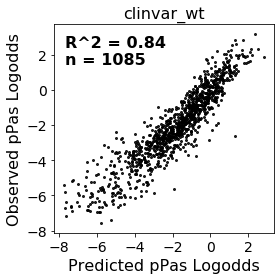

intronic_pas = 9800


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


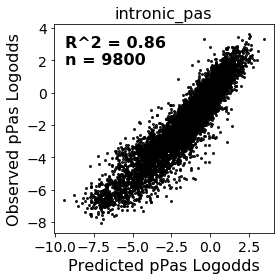

aparent
clinvar_wt = 1085


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


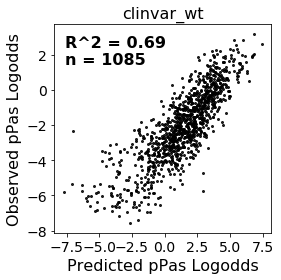

intronic_pas = 9800


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


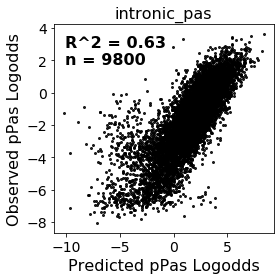

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


deerect_apa
clinvar_wt = 1085


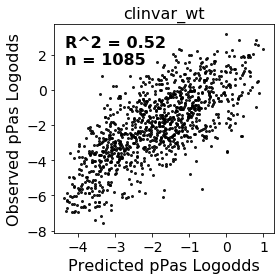

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


intronic_pas = 9800


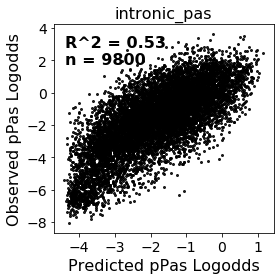

deeppasta
clinvar_wt = 1085


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


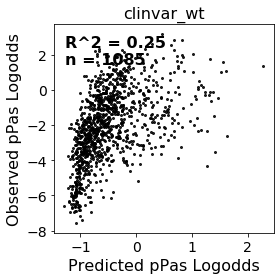

intronic_pas = 9800


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


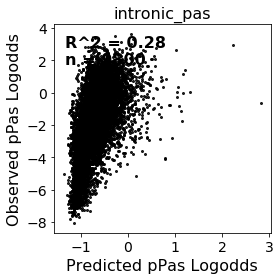

deeppasta_sp
clinvar_wt = 1085


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


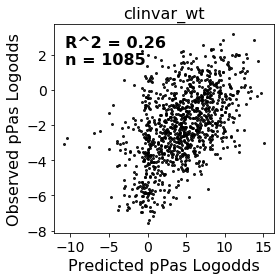

intronic_pas = 9800


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


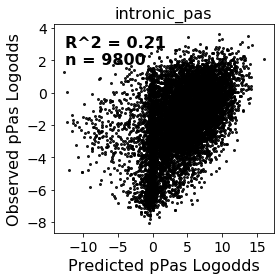

In [8]:
#Absolute native predictions, split by experiment

save_figs = True

seq_dfs = [seq_df_aparent_resnet, seq_df_aparent, seq_df_deerect_apa, seq_df_deeppasta, seq_df_deeppasta_sp]

save_names = ['aparent-resnet', 'aparent', 'deerect_apa', 'deeppasta', 'deeppasta_sp']

pred_columns = ['logodds_pred_from_cuts', 'mean_logodds_pred', 'logodds_pred', 'logodds_pred', 'logodds_pred']
true_columns = ['pooled_proximal_logodds', 'pooled_proximal_logodds', 'pooled_proximal_logodds', 'pooled_proximal_logodds', 'pooled_proximal_logodds']

for seq_df, save_name, pred_column, true_column in zip(seq_dfs, save_names, pred_columns, true_columns) :

    print(save_name)
    
    for experiment in ['clinvar_wt', 'intronic_pas'] :

        filter_query = "variant == 'wt' and mean_total_count >= 200 and n_barcodes >= 7 and experiment == '" + str(experiment) + "'"
        experiment_seq_predicted_isoform_df = seq_df.query(filter_query)

        logodds_true_is_nan = (np.isnan(experiment_seq_predicted_isoform_df[true_column]) | np.isinf(experiment_seq_predicted_isoform_df[true_column]))
        logodds_pred_is_nan = (np.isnan(experiment_seq_predicted_isoform_df[pred_column]) | np.isinf(experiment_seq_predicted_isoform_df[pred_column]))
        experiment_seq_predicted_isoform_df = experiment_seq_predicted_isoform_df.loc[(logodds_true_is_nan == False) & (logodds_pred_is_nan == False)]

        print(experiment + ' = ' + str(len(experiment_seq_predicted_isoform_df)))

        #Logodds proportions

        r_val, _ = pearsonr(experiment_seq_predicted_isoform_df[pred_column], experiment_seq_predicted_isoform_df[true_column])

        f = plt.figure(figsize=(4, 4))

        plt.scatter(experiment_seq_predicted_isoform_df[pred_column], experiment_seq_predicted_isoform_df[true_column], alpha=0.85, s=4, c='black')

        annot_text = 'R^2 = ' + str(round(r_val * r_val, 2))
        annot_text += '\nn = ' + str(len(experiment_seq_predicted_isoform_df))
        ax = plt.gca()
        ax.text(0.05, 0.95, annot_text, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, color='black', fontsize=16, weight="bold")

        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

        plt.xlabel('Predicted pPas Logodds', fontsize=16)
        plt.ylabel('Observed pPas Logodds', fontsize=16)
        plt.title(experiment, fontsize=16)

        plt.tight_layout()

        if save_figs :
            plt.savefig(save_name + '_absolute_usage_pred_vs_true_' + experiment + '.png', transparent=True, dpi=150)
            plt.savefig(save_name + '_absolute_usage_pred_vs_true_' + experiment + '.eps')

        plt.show()


<h2>Human APA variant predictions</h2>

aparent-resnet


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


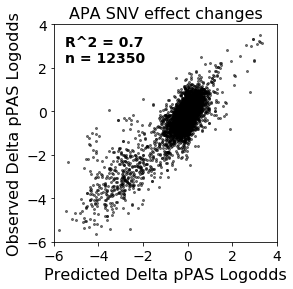

aparent


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


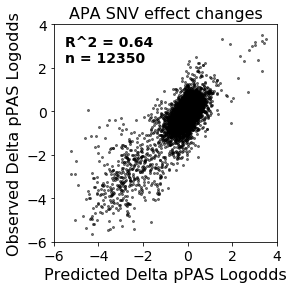

deerect_apa


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


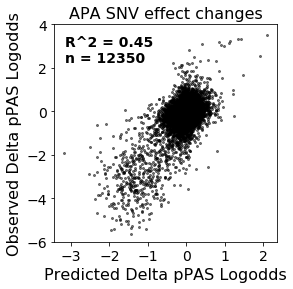

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


deeppasta


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


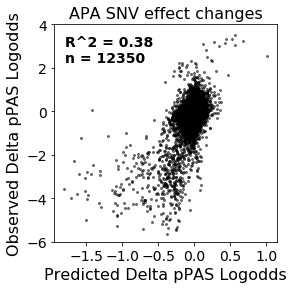

deeppasta_sp


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


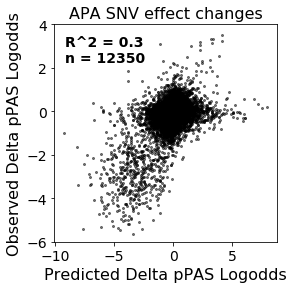

In [10]:
#Variant predictions, log odds ratios

save_figs = True

var_dfs = [aparent_resnet_df, aparent_df, deerect_apa_df, deeppasta_df, deeppasta_sp_df]

save_names = ['aparent-resnet', 'aparent', 'deerect_apa', 'deeppasta', 'deeppasta_sp']

pred_columns = ['delta_logodds_pred_from_cuts', 'delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred']
true_columns = ['delta_logodds_true', 'delta_logodds_true', 'delta_logodds_true', 'delta_logodds_true', 'delta_logodds_true']

for var_df, save_name, pred_column, true_column in zip(var_dfs, save_names, pred_columns, true_columns) :

    print(save_name)
    
    df_to_use = var_df
    
    #df_to_use = df_to_use.query("pooled_proximal_logodds_ref > -2.0")

    r_val, _ = pearsonr(df_to_use[pred_column], df_to_use[true_column])

    f = plt.figure(figsize=(4, 4))

    plt.scatter(df_to_use[pred_column], df_to_use[true_column], alpha=0.5, s=4, c='black')

    annot_text = 'R^2 = ' + str(round(r_val * r_val, 2))
    annot_text += '\nn = ' + str(len(df_to_use))
    ax = plt.gca()
    ax.text(0.05, 0.95, annot_text, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, color='black', fontsize=14, weight="bold")

    if 'aparent' in save_name :
        plt.xlim(-6, 4)
    plt.ylim(-6, 4)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.xlabel('Predicted Delta pPAS Logodds', fontsize=16)
    plt.ylabel('Observed Delta pPAS Logodds', fontsize=16)
    plt.title('APA SNV effect changes', fontsize=16)

    #plt.tight_layout()

    if save_figs :
        plt.savefig(save_name + '_delta_usage_pred_vs_true_all.png', dpi=150, transparent=True)
        plt.savefig(save_name + '_delta_usage_pred_vs_true_all.eps')

    plt.show()


p_thresh = 1.0
delta_thresh = 0.693
nopas = False
 - n_total_variants = 12350
 - n_disruptive_variants = 1584


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


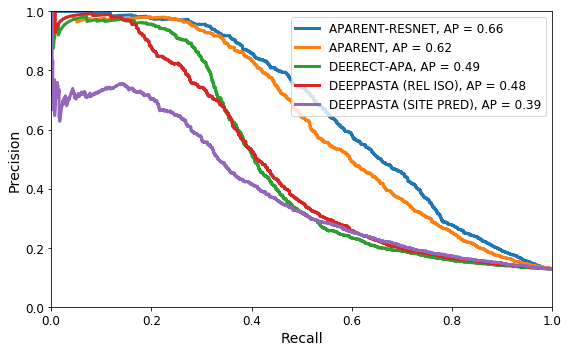

p_thresh = 1.0
delta_thresh = 0.693
nopas = True
 - n_total_variants = 11623
 - n_disruptive_variants = 988


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


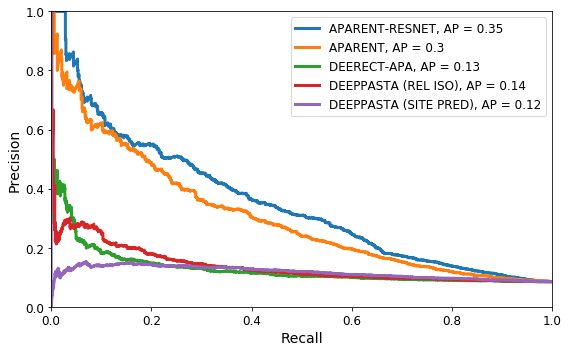

p_thresh = 1.0
delta_thresh = 1.386
nopas = False
 - n_total_variants = 12350
 - n_disruptive_variants = 608


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


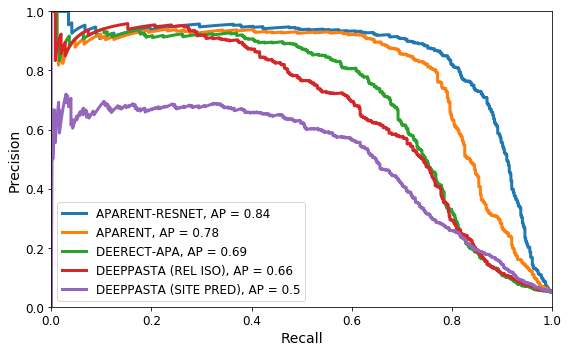

p_thresh = 1.0
delta_thresh = 1.386
nopas = True
 - n_total_variants = 11623
 - n_disruptive_variants = 119


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


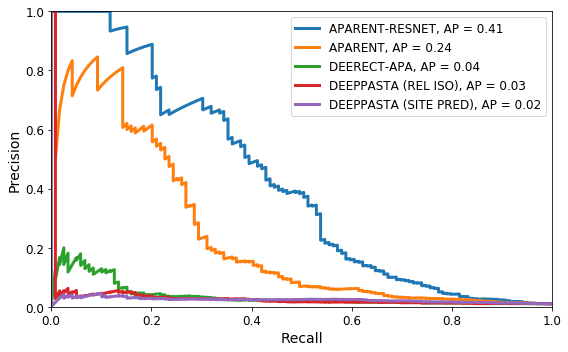

In [11]:
#Compare precision-recall curves for disruptive variant prediction

save_figs = True

p_threshes = [1.0, 1.0, 1.0, 1.0]
delta_threshes = [0.693, 0.693, 1.386, 1.386]
nopases = [False, True, False, True]

var_dfs = [aparent_resnet_df, aparent_df, deerect_apa_df, deeppasta_df, deeppasta_sp_df]

model_names = ['APARENT-ResNet', 'APARENT', 'DeeReCT-APA', 'DeepPASTA (Rel Iso)', 'DeepPASTA (Site Pred)']

pred_columns = ['delta_logodds_pred_from_cuts', 'delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred']

for p_thresh, delta_thresh, nopas in zip(p_threshes, delta_threshes, nopases) :
    
    print("p_thresh = " + str(p_thresh))
    print("delta_thresh = " + str(delta_thresh))
    print("nopas = " + str(nopas))
    
    #Calculate n positives
    aparent_df_filtered = aparent_df.copy()
    if p_thresh is not None and p_thresh < 1.0 :
        aparent_df_filtered = aparent_df_filtered.query("delta_p_val < " + str(p_thresh)).copy()
    if nopas :
        aparent_df_filtered = aparent_df_filtered.query("snv_pos < 50 or snv_pos > 55").copy()
    
    n_total_variants = len(aparent_df_filtered)
    n_disruptive_variants = len(np.nonzero((np.abs(aparent_df_filtered['delta_logodds_true']) > delta_thresh).values)[0])
    
    print(" - n_total_variants = " + str(n_total_variants))
    print(" - n_disruptive_variants = " + str(n_disruptive_variants))
    
    benchmark_name = "apa_human_vars_p_thresh_" + str(p_thresh).replace(".", "_") + "_delta_thresh_" + str(delta_thresh).replace(".", "_") + "_no_pas_" + str(nopas)

    f = plt.figure(figsize=(8, 5))

    ls = []
    
    for model_i, model_name in enumerate(model_names) :
        
        pred_column = pred_columns[model_i]

        var_df_filtered = var_dfs[model_i].copy()
        if p_thresh is not None and p_thresh < 1.0 :
            var_df_filtered = var_df_filtered.query("delta_p_val < " + str(p_thresh)).copy()
        if nopas :
            var_df_filtered = var_df_filtered.query("snv_pos < 50 or snv_pos > 55").copy()

        disrupt_labels = np.zeros(len(var_df_filtered))
        disrupt_labels[(np.abs(var_df_filtered['delta_logodds_true']) > delta_thresh)] = 1.

        disrupt_preds = np.abs(np.array(var_df_filtered[pred_column].values))

        precision, recall, thresholds = precision_recall_curve(disrupt_labels, disrupt_preds)

        ap = average_precision_score(disrupt_labels, disrupt_preds)
        ap = str(round(ap, 2))[:4]

        l1, = plt.plot(recall, precision, linewidth=3, label=model_name.upper() + ", AP = " + str(ap))
        ls.append(l1)

        plt.plot()

    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.xlim(0., 1.)
    plt.ylim(0., 1.)

    #plt.legend(handles=ls, fontsize=12, bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.legend(handles=ls, fontsize=12)
    
    plt.tight_layout()

    if save_figs :
        plt.savefig(benchmark_name + ".png", dpi=300, transparent=True)
        plt.savefig(benchmark_name + ".eps")

    plt.show()


p_thresh = 1.0
delta_thresh = 0.693
nopas = False
logodds_min = None
 - n_total_variants = 12350
 - n_disruptive_variants = 1584


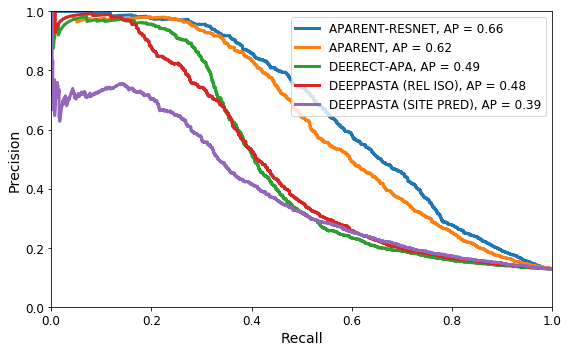

p_thresh = 1.0
delta_thresh = 0.693
nopas = False
logodds_min = -4.0
 - n_total_variants = 10353
 - n_disruptive_variants = 1263


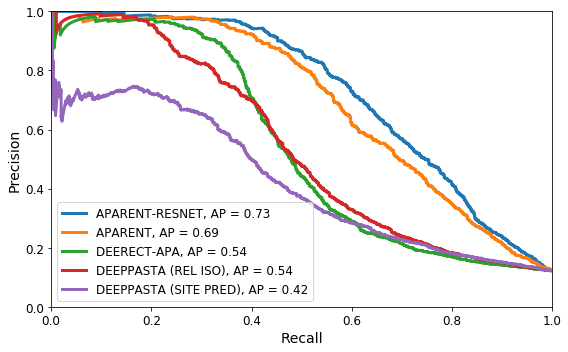

p_thresh = 1.0
delta_thresh = 0.693
nopas = False
logodds_min = -2.0
 - n_total_variants = 6217
 - n_disruptive_variants = 768


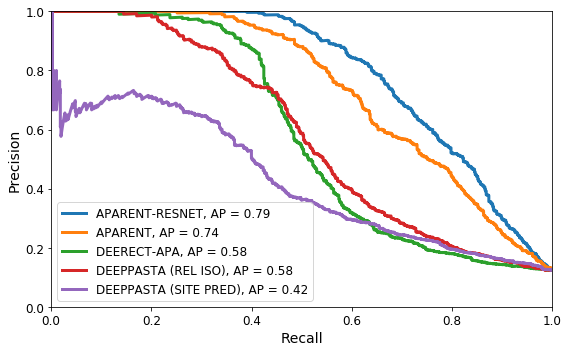

p_thresh = 1.0
delta_thresh = 0.693
nopas = True
logodds_min = None
 - n_total_variants = 11623
 - n_disruptive_variants = 988


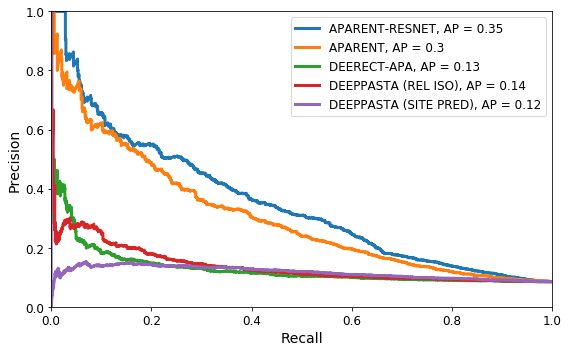

p_thresh = 1.0
delta_thresh = 0.693
nopas = True
logodds_min = -4.0
 - n_total_variants = 9752
 - n_disruptive_variants = 728


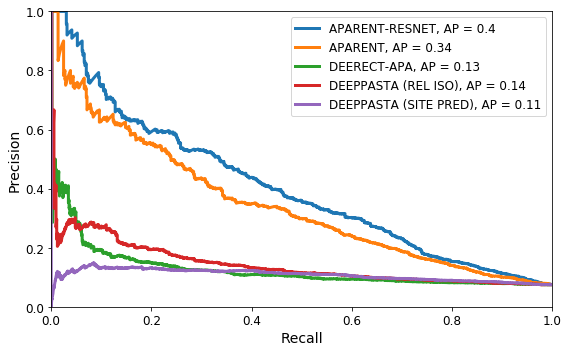

p_thresh = 1.0
delta_thresh = 0.693
nopas = True
logodds_min = -2.0
 - n_total_variants = 5849
 - n_disruptive_variants = 429


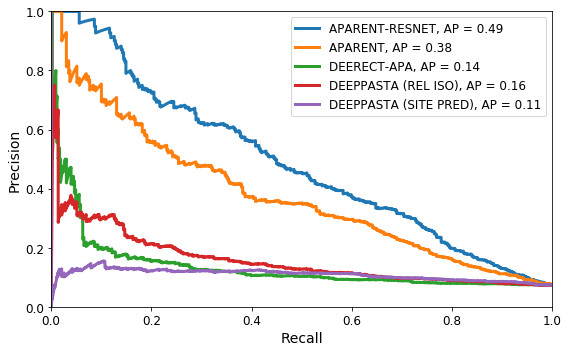

p_thresh = 1.0
delta_thresh = 1.386
nopas = False
logodds_min = None
 - n_total_variants = 12350
 - n_disruptive_variants = 608


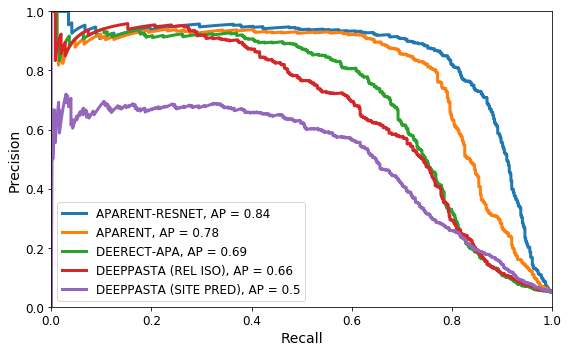

p_thresh = 1.0
delta_thresh = 1.386
nopas = False
logodds_min = -4.0
 - n_total_variants = 10353
 - n_disruptive_variants = 560


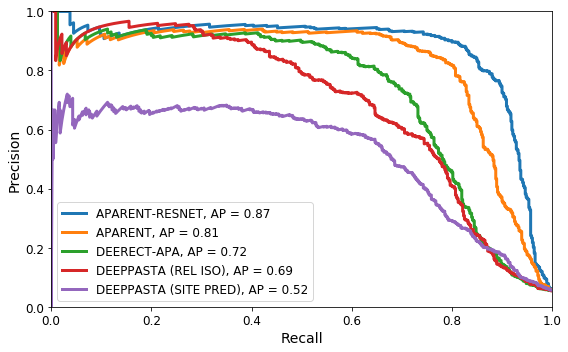

p_thresh = 1.0
delta_thresh = 1.386
nopas = False
logodds_min = -2.0
 - n_total_variants = 6217
 - n_disruptive_variants = 368


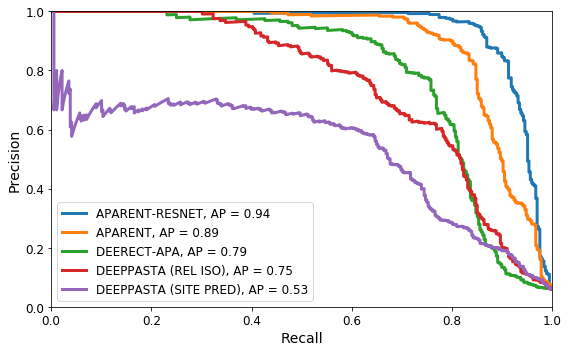

p_thresh = 1.0
delta_thresh = 1.386
nopas = True
logodds_min = None
 - n_total_variants = 11623
 - n_disruptive_variants = 119


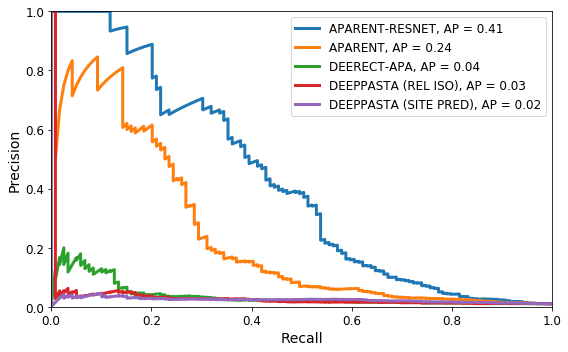

p_thresh = 1.0
delta_thresh = 1.386
nopas = True
logodds_min = -4.0
 - n_total_variants = 9752
 - n_disruptive_variants = 99


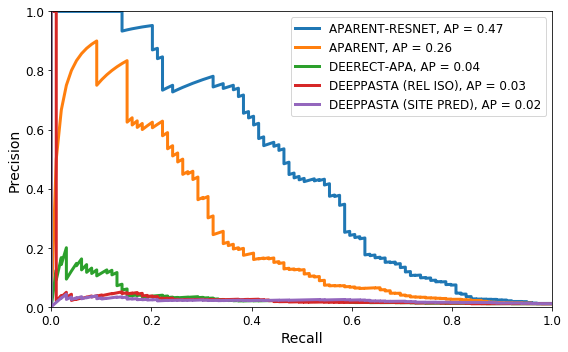

p_thresh = 1.0
delta_thresh = 1.386
nopas = True
logodds_min = -2.0
 - n_total_variants = 5849
 - n_disruptive_variants = 64


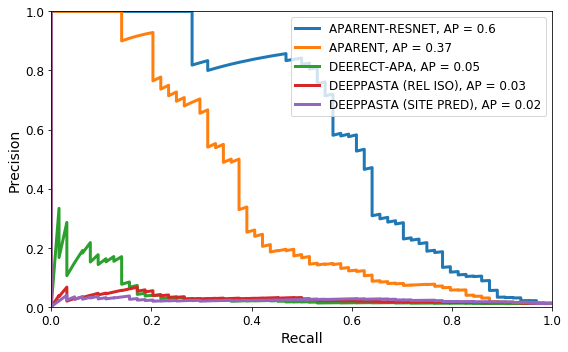

In [11]:
#Compare precision-recall curves for disruptive variant prediction

save_figs = False

p_threshes = [1.0, 1.0, 1.0, 1.0]
delta_threshes = [0.693, 0.693, 1.386, 1.386]
nopases = [False, True, False, True]

var_dfs = [aparent_resnet_df, aparent_df, deerect_apa_df, deeppasta_df, deeppasta_sp_df]

model_names = ['APARENT-ResNet', 'APARENT', 'DeeReCT-APA', 'DeepPASTA (Rel Iso)', 'DeepPASTA (Site Pred)']

pred_columns = ['delta_logodds_pred_from_cuts', 'delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred']

logodds_mins = [None, -4.0, -2.0]

for p_thresh, delta_thresh, nopas in zip(p_threshes, delta_threshes, nopases) :
    
    for logodds_min in logodds_mins :
        
        print("p_thresh = " + str(p_thresh))
        print("delta_thresh = " + str(delta_thresh))
        print("nopas = " + str(nopas))
        print("logodds_min = " + str(logodds_min))

        #Calculate n positives
        aparent_df_filtered = aparent_df.copy()
        if p_thresh is not None and p_thresh < 1.0 :
            aparent_df_filtered = aparent_df_filtered.query("delta_p_val < " + str(p_thresh)).copy()
        if nopas :
            aparent_df_filtered = aparent_df_filtered.query("snv_pos < 50 or snv_pos > 55").copy()
        if logodds_min is not None :
            aparent_df_filtered = aparent_df_filtered.query("pooled_proximal_vs_distal_logodds_ref > " + str(logodds_min)).copy()

        n_total_variants = len(aparent_df_filtered)
        n_disruptive_variants = len(np.nonzero((np.abs(aparent_df_filtered['delta_logodds_true']) > delta_thresh).values)[0])

        print(" - n_total_variants = " + str(n_total_variants))
        print(" - n_disruptive_variants = " + str(n_disruptive_variants))

        benchmark_name = "apa_human_vars_p_thresh_" + str(p_thresh).replace(".", "_") + "_delta_thresh_" + str(delta_thresh).replace(".", "_") + "_no_pas_" + str(nopas) + "_logodds_min_" + str(logodds_min).replace(".", "_")

        f = plt.figure(figsize=(8, 5))

        ls = []

        for model_i, model_name in enumerate(model_names) :

            pred_column = pred_columns[model_i]

            var_df_filtered = var_dfs[model_i].copy()
            if p_thresh is not None and p_thresh < 1.0 :
                var_df_filtered = var_df_filtered.query("delta_p_val < " + str(p_thresh)).copy()
            if nopas :
                var_df_filtered = var_df_filtered.query("snv_pos < 50 or snv_pos > 55").copy()
            if logodds_min is not None :
                var_df_filtered = var_df_filtered.query("pooled_proximal_vs_distal_logodds_ref > " + str(logodds_min)).copy()

            disrupt_labels = np.zeros(len(var_df_filtered))
            disrupt_labels[(np.abs(var_df_filtered['delta_logodds_true']) > delta_thresh)] = 1.

            disrupt_preds = np.abs(np.array(var_df_filtered[pred_column].values))

            precision, recall, thresholds = precision_recall_curve(disrupt_labels, disrupt_preds)

            ap = average_precision_score(disrupt_labels, disrupt_preds)
            ap = str(round(ap, 2))[:4]

            l1, = plt.plot(recall, precision, linewidth=3, label=model_name.upper() + ", AP = " + str(ap))
            ls.append(l1)

            plt.plot()

        plt.xlabel("Recall", fontsize=14)
        plt.ylabel("Precision", fontsize=14)

        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        plt.xlim(0., 1.)
        plt.ylim(0., 1.)

        #plt.legend(handles=ls, fontsize=12, bbox_to_anchor=(1.01, 1), loc='upper left')
        plt.legend(handles=ls, fontsize=12)

        plt.tight_layout()

        if save_figs :
            plt.savefig(benchmark_name + ".png", dpi=300, transparent=True)
            plt.savefig(benchmark_name + ".eps")

        plt.show()
